In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
%matplotlib inline
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as ticker
from pylab import MaxNLocator
import seaborn as sns; sns.set()
from matplotlib.colors import LogNorm
from matplotlib import gridspec
from sklearn.manifold import TSNE

#for exporting to Adobe Illustrator
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

####################################################################################################################################################################################

## Only need to run code below once!

####################################################################################################################################################################################

### Run t-SNE on pairwise distance matrix to get the embeddings

Load the pairwise SNP distance matrix

In [3]:
pairwise_SNP_dist = np.load('/n/data1/hms/dbmi/farhat/Roger/homoplasy_project/rolling_DB_scrape/Genotypes_Filtered_2/pairwise_distance_matrix/pairwise_SNP_distance_matrix.npy')

In [4]:
pairwise_SNP_dist

array([[   0,  606, 1139, ..., 1061,  174,  670],
       [ 606,    0, 1124, ..., 1036,  623,  645],
       [1139, 1124,    0, ..., 1035, 1152, 1177],
       ...,
       [1061, 1036, 1035, ...,    0, 1066, 1095],
       [ 174,  623, 1152, ..., 1066,    0,  683],
       [ 670,  645, 1177, ..., 1095,  683,    0]])

In [5]:
np.shape(pairwise_SNP_dist)

(31428, 31428)

In [ ]:
perplex = 200 #200
tsne_steps = 1000 #1000
lr = 2500 #2500

tsne = TSNE(perplexity=perplex, 
            n_components=2, 
            metric="precomputed",
            n_iter=tsne_steps, 
            learning_rate=lr)

t_SNE_coords = tsne.fit_transform(pairwise_SNP_dist)

In [153]:
t_SNE_coords

array([[ 63.50081  , -38.788918 ],
       [ 93.47421  ,  -7.554368 ],
       [  6.4459553,  71.186165 ],
       ...,
       [-25.14468  , -45.223312 ],
       [ 52.92676  , -49.446873 ],
       [-49.539288 ,  47.868477 ]], dtype=float32)

In [154]:
np.shape(t_SNE_coords)

(31428, 2)

Store the t-SNE embeddings to homoplasy visualizations

In [142]:
# np.savetxt('/n/data1/hms/dbmi/farhat/Roger/homoplasy_project/rolling_DB_scrape/Genotypes_Filtered_2/pairwise_distance_matrix/tb_output/tSNE_embeddings_from_pairwise_SNP_dist.txt' , t_SNE_coords)

####################################################################################################################################################################################

####################################################################################################################################################################################

### Load t-SNE embeddings if already run (above)

In [3]:
t_SNE_coords = np.loadtxt('/n/data1/hms/dbmi/farhat/Roger/homoplasy_project/rolling_DB_scrape/Genotypes_Filtered_2/pairwise_distance_matrix/tb_output/tSNE_embeddings_from_pairwise_SNP_dist.txt')

In [4]:
plt.style.use('ggplot')
plt.rcParams['lines.linewidth']=0
plt.rcParams['axes.facecolor']='1.0'
plt.rcParams['xtick.color']='black'
plt.rcParams['axes.grid']=False
plt.rcParams['axes.edgecolor']='black'
plt.rcParams['grid.color']= '1.0'
plt.rcParams.update({'font.size': 14})

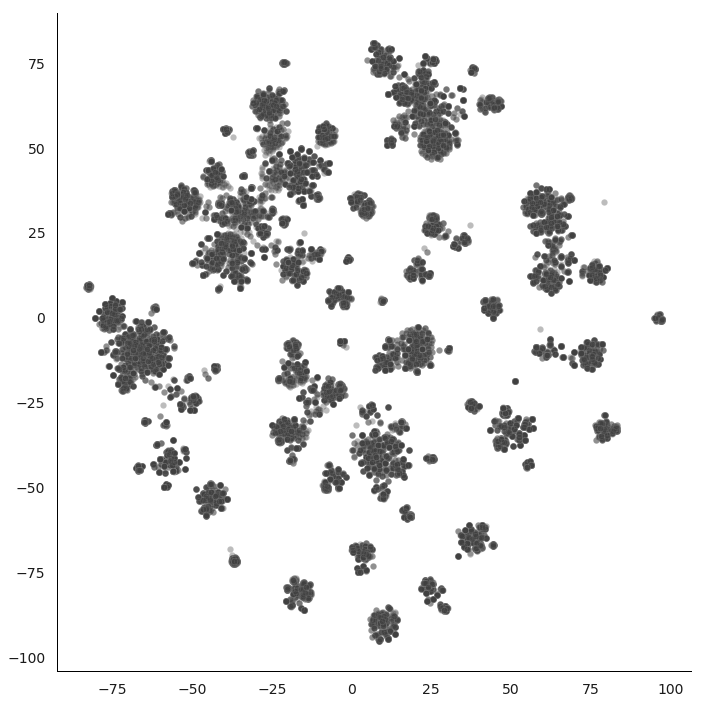

In [5]:
fig , ax = plt.subplots()

circ_size = 40
alpha = 0.35
linewidth = 0.15

plt.scatter( t_SNE_coords[: , 0] , t_SNE_coords[: , 1]  , color = '0.25' , edgecolor = 'white' , linewidth = linewidth , alpha = alpha , s = circ_size)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.tick_params(axis='y', which='major', labelsize=14, pad = 6, labelcolor = 'k')
ax.tick_params(axis='x', which='major', labelsize=14, pad = 6, labelcolor = 'k')

fig = plt.gcf()
fig.set_size_inches(10.0, 10.0)
fig.tight_layout()

## file_name = '/n/data1/hms/dbmi/farhat/Roger/inhost_TB_dynamics_project/genotypes_matrix_and_tSNE/figures/t_SNE_plots/basic_tSNE.pdf'
## plt.savefig(file_name, bbox_inches='tight', dpi = 300 , transparent = True)

plt.show()

Get ordering of isolates & lineage calls from isolate annotation file

In [6]:
isolate_annotation_DF = pd.read_pickle('/n/data1/hms/dbmi/farhat/Roger/homoplasy_project/rolling_DB_scrape/Genotypes_Filtered_2/genotypes_isolate_annotation.pkl')

In [7]:
isolate_annotation_DF.head()

,lineage_1,lineage_2,lineage_3,lineage_4,lineage_5,lineage_6,lineage_7,lineage_8,lineage_9,lineage_10,lineage_11,isolate_ID,lineage_call,group
0,4,2,1,2,1,1,i3,1,NaN,NaN,NaN,SAMEA3558733,4.2.1.2.1.1.i3.1,4B
1,4,2,1,2,2,1,1,NaN,NaN,NaN,NaN,SAMN03648641,4.2.1.2.2.1.1,4B
2,3,1,1,i1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SAMN03647419,3.1.1.i1,3
3,4,2,1,2,1,1,i1,NaN,NaN,NaN,NaN,SAMEA3671418,4.2.1.2.1.1.i1,4B
4,1,1,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SAMN07659096,1.1.1.2,1


In [8]:
np.shape(isolate_annotation_DF)

(31428, 14)

### Global Lineages

Plot coordinates for each isolate

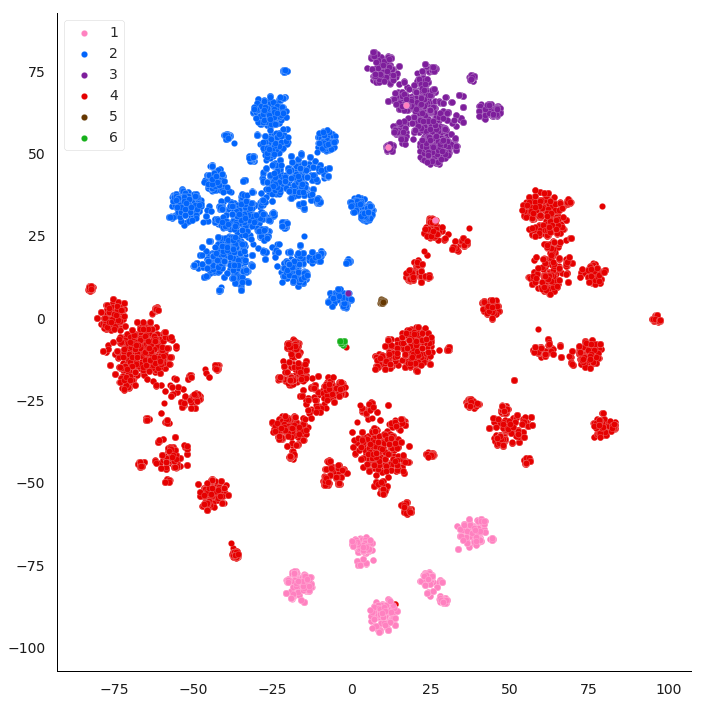

In [13]:
fig , ax = plt.subplots()

circ_size = 40
alpha = 1.0
linewidth = 0.15

#Modern 
#lineage 2 (N = )
L2 = plt.scatter( t_SNE_coords[: , 0][isolate_annotation_DF.lineage_1 == '2'] , t_SNE_coords[: , 1][isolate_annotation_DF.lineage_1 == '2']  , color = 'xkcd:bright blue' , edgecolor = 'white' , linewidth = linewidth , alpha = alpha , s = circ_size)

#lineage 4 (N = )
L4 = plt.scatter( t_SNE_coords[: , 0][isolate_annotation_DF.lineage_1 == '4'] , t_SNE_coords[: , 1][isolate_annotation_DF.lineage_1 == '4']  , color = 'xkcd:red' , edgecolor = 'white' , linewidth = linewidth , alpha = alpha , s = circ_size)

#Ancestral
#lineage 3 (N = )
L3 = plt.scatter( t_SNE_coords[: , 0][isolate_annotation_DF.lineage_1 == '3'] , t_SNE_coords[: , 1][isolate_annotation_DF.lineage_1 == '3']  , color = 'xkcd:purple' , edgecolor = 'white' , linewidth = linewidth , alpha = alpha , s = circ_size)

#lineage 1 (N = )
L1 = plt.scatter( t_SNE_coords[: , 0][isolate_annotation_DF.lineage_1 == '1'] , t_SNE_coords[: , 1][isolate_annotation_DF.lineage_1 == '1']  , color = 'xkcd:pink' , edgecolor = 'white' , linewidth = linewidth , alpha = alpha , s = circ_size)

#lineage 5 (N = )
L5 = plt.scatter( t_SNE_coords[: , 0][isolate_annotation_DF.lineage_1 == '5'] , t_SNE_coords[: , 1][isolate_annotation_DF.lineage_1 == '5']  , color = 'xkcd:brown' , edgecolor = 'white' , linewidth = linewidth , alpha = alpha , s = circ_size)

#lineage 6 (N = )
L6 = plt.scatter( t_SNE_coords[: , 0][isolate_annotation_DF.lineage_1 == '6'] , t_SNE_coords[: , 1][isolate_annotation_DF.lineage_1 == '6']  , color = 'xkcd:green' , edgecolor = 'white' , linewidth = linewidth , alpha = alpha , s = circ_size)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.tick_params(axis='y', which='major', labelsize=14, pad = 6, labelcolor = 'k')
ax.tick_params(axis='x', which='major', labelsize=14, pad = 6, labelcolor = 'k')

#add legend
plt.legend((L1, L2, L3, L4, L5, L6), ('1', '2', '3', '4', '5', '6'), scatterpoints=1, loc='upper left',ncol=1,fontsize=14)

fig = plt.gcf()
fig.set_size_inches(10.0, 10.0)
fig.tight_layout()

## file_name = '/n/data1/hms/dbmi/farhat/Roger/inhost_TB_dynamics_project/genotypes_matrix_and_tSNE/figures/t_SNE_plots/1_global_lineages.pdf'
## plt.savefig(file_name, bbox_inches='tight', dpi = 300 , transparent = True)

plt.show()

### Isolate Group

In [10]:
isolate_annotation_DF.head()

,lineage_1,lineage_2,lineage_3,lineage_4,lineage_5,lineage_6,lineage_7,lineage_8,lineage_9,lineage_10,lineage_11,isolate_ID,lineage_call,group
0,4,2,1,2,1,1,i3,1,NaN,NaN,NaN,SAMEA3558733,4.2.1.2.1.1.i3.1,4B
1,4,2,1,2,2,1,1,NaN,NaN,NaN,NaN,SAMN03648641,4.2.1.2.2.1.1,4B
2,3,1,1,i1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SAMN03647419,3.1.1.i1,3
3,4,2,1,2,1,1,i1,NaN,NaN,NaN,NaN,SAMEA3671418,4.2.1.2.1.1.i1,4B
4,1,1,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SAMN07659096,1.1.1.2,1


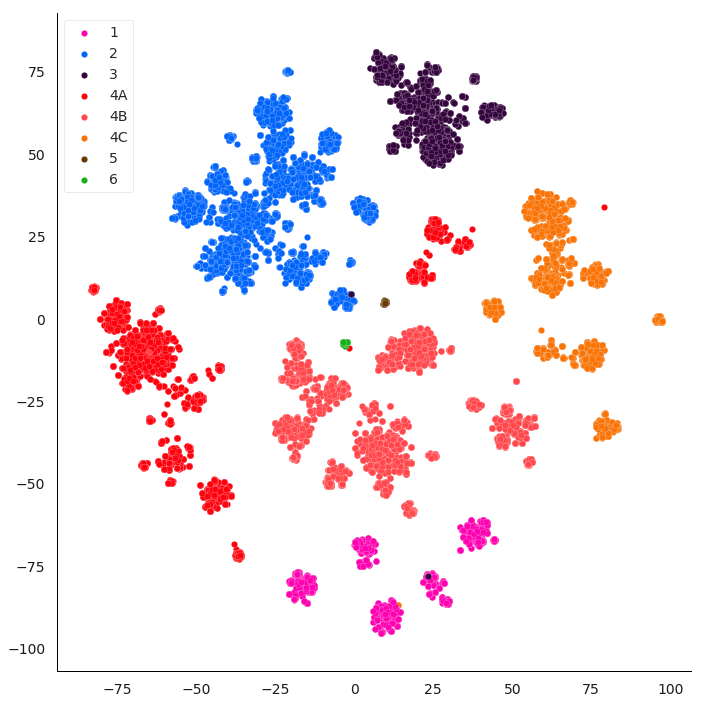

In [32]:
fig , ax = plt.subplots()

circ_size = 40
alpha = 1.0
linewidth = 0.15

#Group 4C (N = X)
G4C = plt.scatter( t_SNE_coords[: , 0][isolate_annotation_DF.group == '4C'] , t_SNE_coords[: , 1][isolate_annotation_DF.group == '4C']  , color = 'xkcd:orange' , edgecolor = 'white' , linewidth = linewidth , alpha = alpha , s = circ_size)

#Group 1 (N = X)
G1 = plt.scatter( t_SNE_coords[: , 0][isolate_annotation_DF.group == '1'] , t_SNE_coords[: , 1][isolate_annotation_DF.group == '1']  , color = 'xkcd:bright pink' , edgecolor = 'white' , linewidth = linewidth , alpha = alpha , s = circ_size)

#Group 2 (N = X)
G2 = plt.scatter( t_SNE_coords[: , 0][isolate_annotation_DF.group == '2'] , t_SNE_coords[: , 1][isolate_annotation_DF.group == '2']  , color = 'xkcd:bright blue' , edgecolor = 'white' , linewidth = linewidth , alpha = alpha , s = circ_size)

#Group 3 (N = X)
G3 = plt.scatter( t_SNE_coords[: , 0][isolate_annotation_DF.group == '3'] , t_SNE_coords[: , 1][isolate_annotation_DF.group == '3']  , color = 'xkcd:dark purple' , edgecolor = 'white' , linewidth = linewidth , alpha = alpha , s = circ_size)

#Group 4A (N = X)
G4A = plt.scatter( t_SNE_coords[: , 0][isolate_annotation_DF.group == '4A'] , t_SNE_coords[: , 1][isolate_annotation_DF.group == '4A']  , color = 'xkcd:bright red' , edgecolor = 'white' , linewidth = linewidth , alpha = alpha , s = circ_size)

#Group 4B (N = X)
G4B = plt.scatter( t_SNE_coords[: , 0][isolate_annotation_DF.group == '4B'] , t_SNE_coords[: , 1][isolate_annotation_DF.group == '4B']  , color = 'xkcd:light red' , edgecolor = 'white' , linewidth = linewidth , alpha = alpha , s = circ_size)

#Group 5 (N = X)
G5 = plt.scatter( t_SNE_coords[: , 0][isolate_annotation_DF.group == '5'] , t_SNE_coords[: , 1][isolate_annotation_DF.group == '5']  , color = 'xkcd:brown' , edgecolor = 'white' , linewidth = linewidth , alpha = alpha , s = circ_size)

#Group 6 (N = X)
G6 = plt.scatter( t_SNE_coords[: , 0][isolate_annotation_DF.group == '6'] , t_SNE_coords[: , 1][isolate_annotation_DF.group == '6']  , color = 'xkcd:green' , edgecolor = 'white' , linewidth = linewidth , alpha = alpha , s = circ_size)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.tick_params(axis='y', which='major', labelsize=14, pad = 6, labelcolor = 'k')
ax.tick_params(axis='x', which='major', labelsize=14, pad = 6, labelcolor = 'k')

#add legend
plt.legend((G1, G2, G3, G4A, G4B, G4C, G5, G6), ('1', '2', '3', '4A', '4B', '4C' , '5', '6'), scatterpoints=1, loc='upper left',ncol=1,fontsize=14)

fig = plt.gcf()
fig.set_size_inches(10.0, 10.0)
fig.tight_layout()

## file_name = '/n/data1/hms/dbmi/farhat/Roger/inhost_TB_dynamics_project/genotypes_matrix_and_tSNE/figures/t_SNE_plots/1_global_lineages.pdf'
## plt.savefig(file_name, bbox_inches='tight', dpi = 300 , transparent = True)

plt.show()

### *Function* to color isolates by isolate group seperately

In [23]:
def plot_tSNE_for_isolate_group(isolate_group , color):

    fig , ax = plt.subplots()

    circ_size = 40
    linewidth = 0.15

    #non isolate group isolates
    non_group_color = plt.scatter( t_SNE_coords[: , 0][isolate_annotation_DF.group != isolate_group] , t_SNE_coords[: , 1][isolate_annotation_DF.group != isolate_group]  , color = '0.85' , edgecolor = 'white' , linewidth = linewidth , alpha = 0.5 , s = circ_size)

    #isolate group isolates
    group_color = plt.scatter( t_SNE_coords[: , 0][isolate_annotation_DF.group == isolate_group] , t_SNE_coords[: , 1][isolate_annotation_DF.group == isolate_group]  , color = color , edgecolor = 'white' , linewidth = linewidth , alpha = 1.0 , s = circ_size)

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    ax.tick_params(axis='y', which='major', labelsize=14, pad = 6, labelcolor = 'k')
    ax.tick_params(axis='x', which='major', labelsize=14, pad = 6, labelcolor = 'k')

    #add legend
    plt.legend((group_color , non_group_color), (isolate_group, 'other'), scatterpoints=1, loc='upper right',ncol=1,fontsize=12)

    fig = plt.gcf()
    fig.set_size_inches(10.0, 10.0)
    fig.tight_layout()

    ## file_name = '/n/data1/hms/dbmi/farhat/Roger/inhost_TB_dynamics_project/genotypes_matrix_and_tSNE/figures/t_SNE_plots/4_lineage4.pdf'
    ## plt.savefig(file_name, bbox_inches='tight', dpi = 300 , transparent = True)

    plt.show()

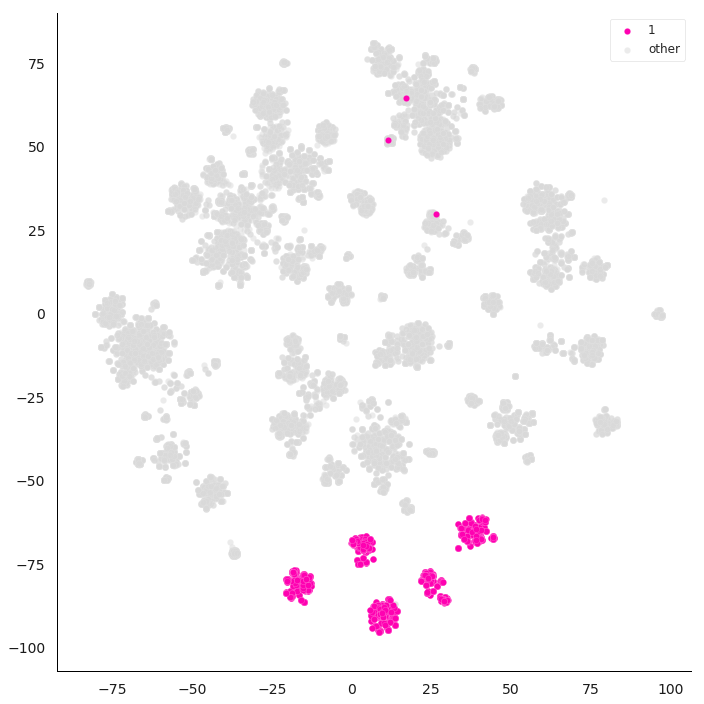

In [24]:
plot_tSNE_for_isolate_group('1' , 'xkcd:bright pink')

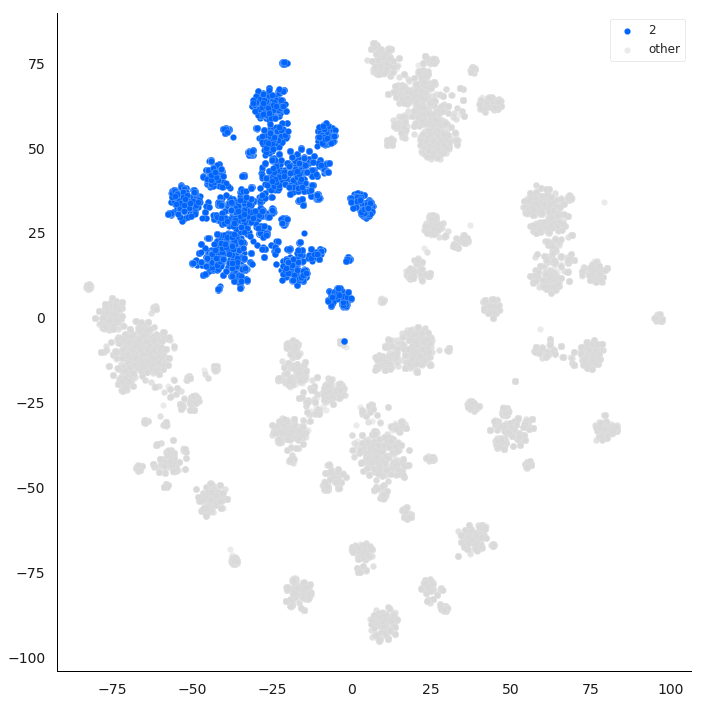

In [25]:
plot_tSNE_for_isolate_group('2' , 'xkcd:bright blue')

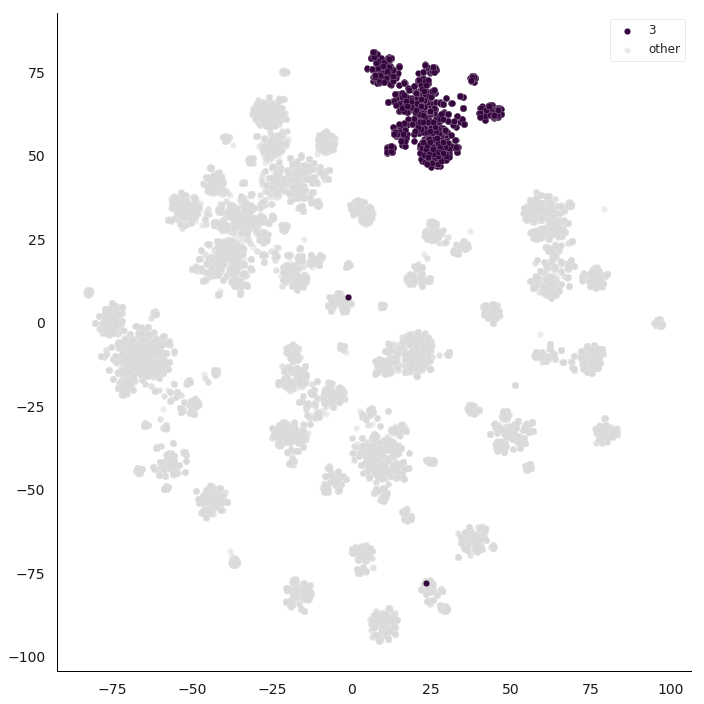

In [26]:
plot_tSNE_for_isolate_group('3' , 'xkcd:dark purple')

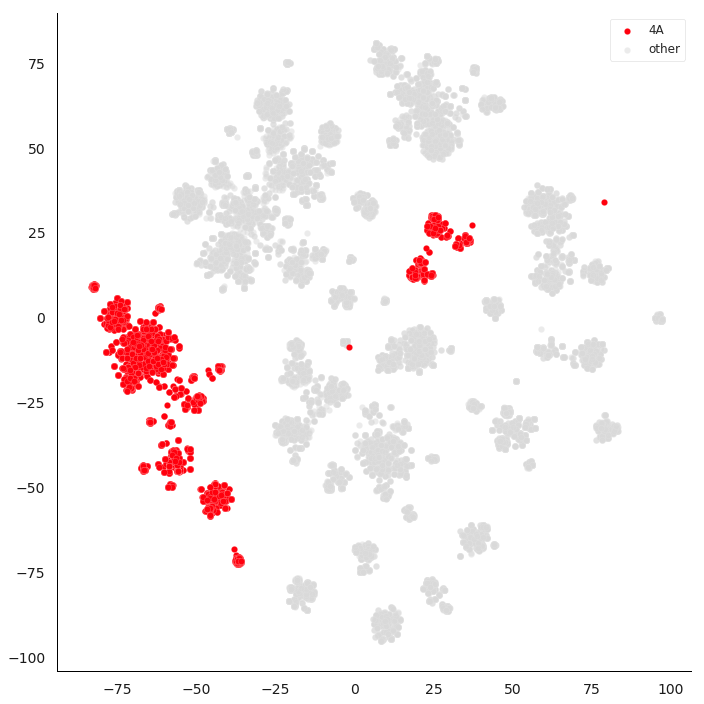

In [27]:
plot_tSNE_for_isolate_group('4A' , 'xkcd:bright red')

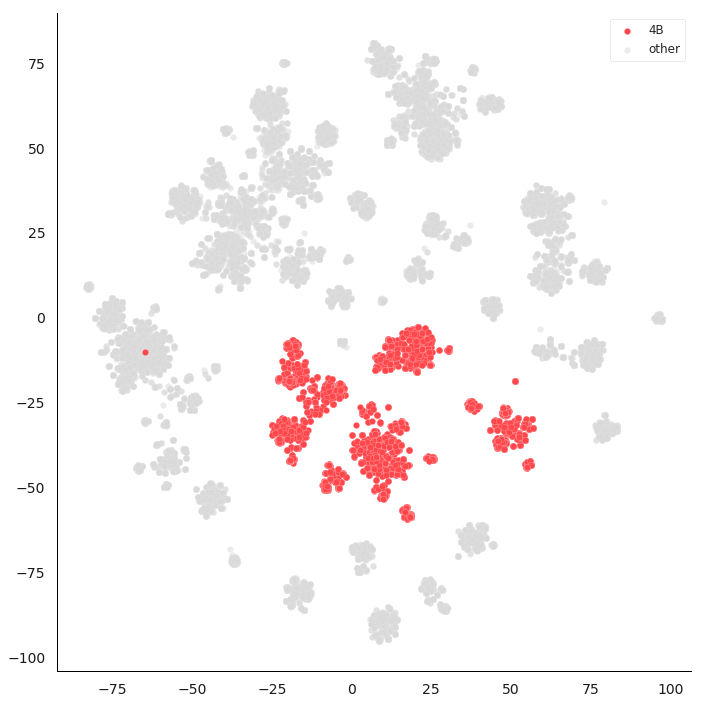

In [28]:
plot_tSNE_for_isolate_group('4B' , 'xkcd:light red')

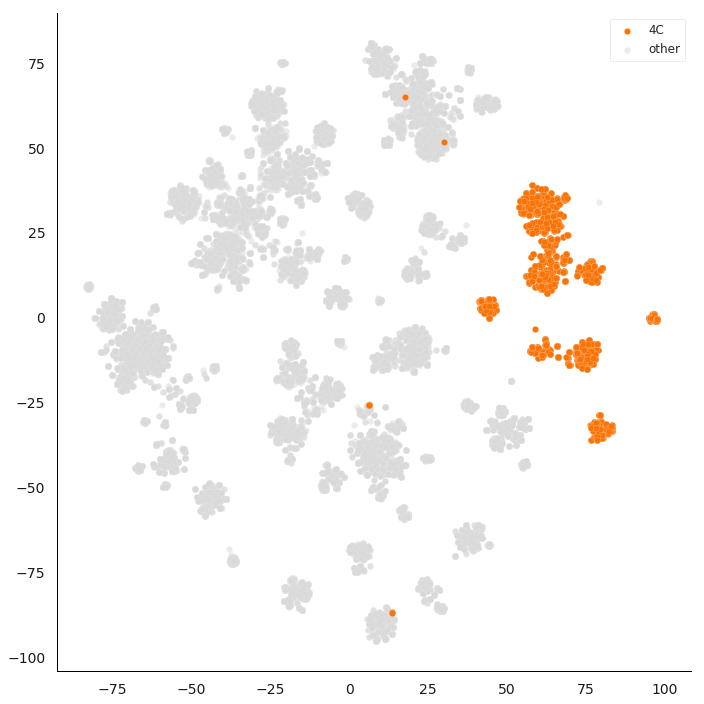

In [29]:
plot_tSNE_for_isolate_group('4C' , 'xkcd:orange')

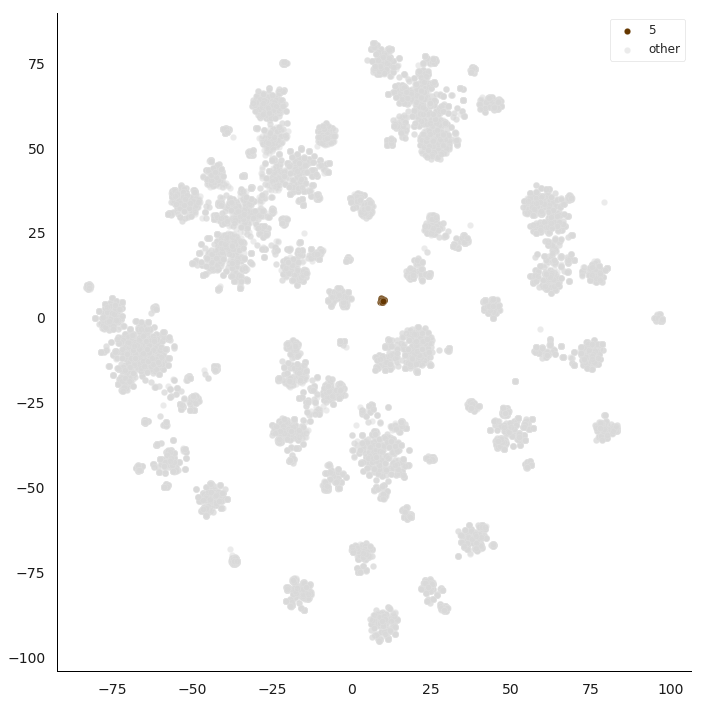

In [33]:
plot_tSNE_for_isolate_group('5' , 'xkcd:brown')

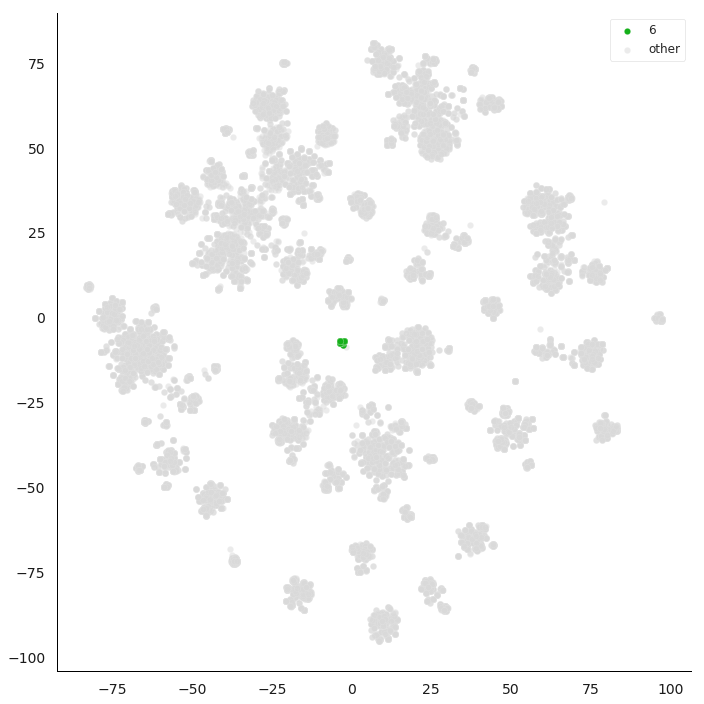

In [31]:
plot_tSNE_for_isolate_group('6' , 'xkcd:green')